# Contours

[16:02:45] INFO - Showing image ... (13.31 x 20.48)
[16:02:45] INFO - Showing image ... (13.31 x 20.48)


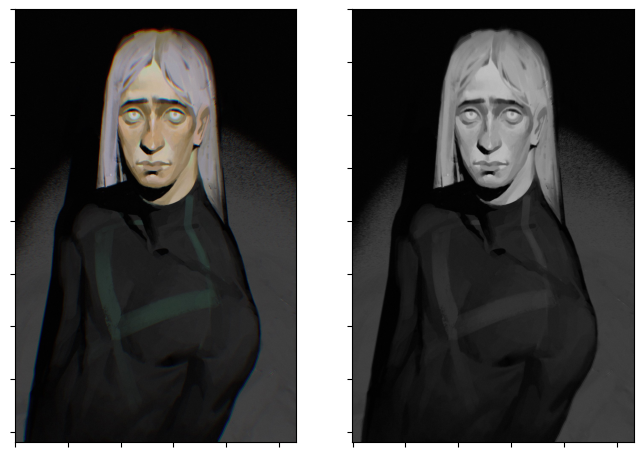

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from custom_utils import *

import logging
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )
height, width, img, img_rgb, img_gray = load_image_and_show("../data/ptitsatart2.jpeg", scale=.3)

Preprocessing

- binary images provide better accuracy

In [3]:
?cv.drawContours

Docstring:
drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
.   @brief Draws contours outlines or filled contours.
.   
.   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
.   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
.   connected components from the binary image and label them: :
.   @include snippets/imgproc_drawContours.cpp
.   
.   @param image Destination image.
.   @param contours All the input contours. Each contour is stored as a point vector.
.   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
.   @param color Color of the contours.
.   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
.   thickness=#FILLED ), the contour interiors are drawn.
.   @param lineType Line connectivity. See #LineTypes
.   @

[16:02:46] INFO - Showing image ... (3.3275 x 5.12)


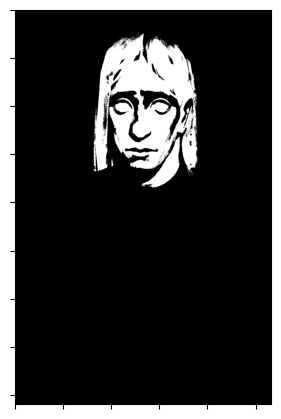

In [4]:
# img_binary = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)[1]
show_image(img_binary, scale=.25, imshow_args={"cmap": "gray"})

[16:02:47] INFO - Showing image ... (13.31 x 20.48)
[16:02:47] INFO - Showing image ... (13.31 x 20.48)


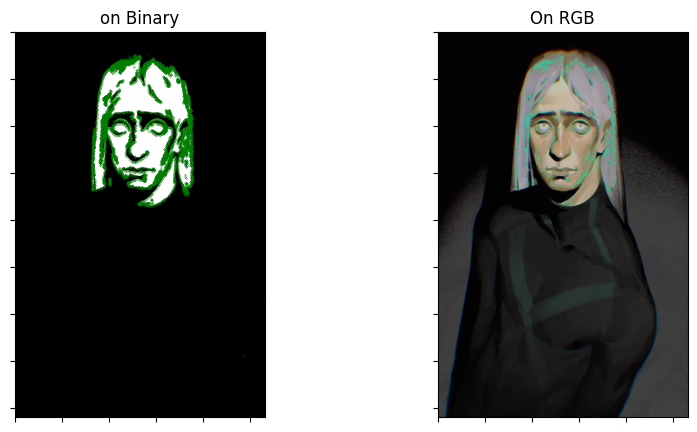

In [5]:
# contours are basically points at the boundary of the white area
# it's useful to detect shapes, areas, etc.
contours, hierarchy = cv.findContours(img_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Note: not sure why each item in contours is specified that way but I guess
#    it has something to do with optimization
_, ax = plt.subplots(1, 2, figsize=(10, 5))

# using scatter
contours_combined = np.r_[tuple(contours)].reshape(-1, 2)
show_image(img_binary, ax=ax[0], title='on Binary', imshow_args={"cmap": "gray"})
ax[0].scatter(contours_combined[:, 0], contours_combined[:, 1], s=0.01, color='green')

# using cv.drawContours
show_image(cv.drawContours(img_rgb, contours, -1, (0, 255, 179)), ax=ax[1], title='On RGB')
plt.show()

## Contour Features

[16:02:47] INFO - Showing image ... (5.07 x 3.41)
[16:02:47] INFO - Showing image ... (5.07 x 3.41)


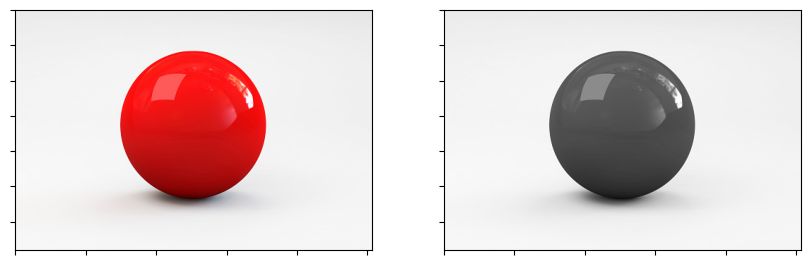

In [6]:
# we will load a new picture now
height, width, img, img_rgb, img_gray = load_image_and_show("../data/redball.jpeg")

[16:02:48] INFO - Showing image ... (5.07 x 3.41)


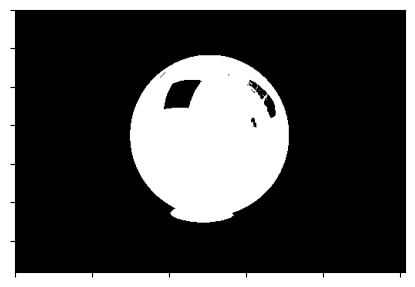

In [7]:
# img_binary = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV)[1]
show_image(img_binary, imshow_args={"cmap": "gray"})

[16:02:48] INFO - Showing image ... (5.07 x 3.41)
[16:02:48] INFO - Showing image ... (5.07 x 3.41)


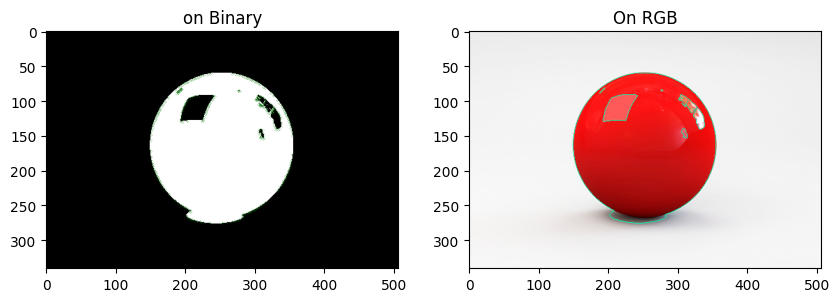

In [8]:
# contours are basically points at the boundary of the white area
# it's useful to detect shapes, areas, etc.
contours, hierarchy = cv.findContours(img_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Note: not sure why each item in contours is specified that way but I guess
#    it has something to do with optimization
_, ax = plt.subplots(1, 2, figsize=(10, 5))

# using scatter
contours_combined = np.r_[tuple(contours)].reshape(-1, 2)
show_image(img_binary.copy(), ax=ax[0], title='on Binary', imshow_args={"cmap": "gray"}, show_ticks=True)
ax[0].scatter(contours_combined[:, 0], contours_combined[:, 1], s=0.01, color='green')

# using cv.drawContours
show_image(cv.drawContours(img_rgb.copy(), contours, -1, (0, 255, 179)), ax=ax[1], title='On RGB', show_ticks=True)
plt.show()

### Moments, Area & Parameter

[16:02:48] INFO - Showing image ... (5.07 x 3.41)
[16:02:48] INFO - Showing image ... (5.07 x 3.41)


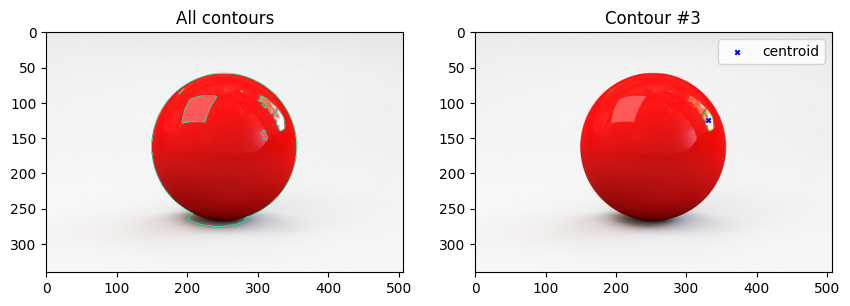

Contour area: 301.5
Contour perimeter 78.18376529216766


In [9]:
random_idx = 3 #int((np.random.sample(1) * len(contours))[0])
cnt = contours[random_idx]

# you can use moments to calculate some features of the contour
M = cv.moments(cnt)

# for example, you can use moments to calculate centroids
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

_, ax = plt.subplots(1, 2, figsize=(width*2/100, height/100))

show_image(
    cv.drawContours(img_rgb.copy(), contours, -1, (0, 255, 179)),
    title='All contours',
    show_ticks=True,
    ax=ax[0]
)

show_image(
    cv.drawContours(img_rgb.copy(), [cnt], 0, (0, 255, 0)),
    title=f'Contour #{random_idx}',
    show_ticks=True,
    ax=ax[1]
)
ax[1].scatter(cx, cy, s=10, color='blue', marker='x', label = 'centroid')
plt.legend()
plt.show()

# other features
print('Contour area:', cv.contourArea(cnt))
print('Contour perimeter', cv.arcLength(cnt, True))


### Contour Approximation, Hull, Checking Convexity

In [10]:
?cv.rectangle

Docstring:
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.



rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
.   @overload
.   
.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and
.   r.br()-Point(1,1)` are opposite corners
Type:      builtin_function

[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)


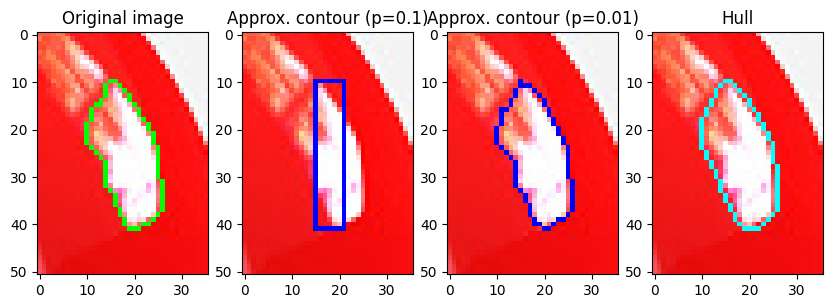

THe hull is convex (of course): True


In [11]:
percentage_errors = [0.1, 0.01]

# the part of image that contains the contour
cnt_ = cnt.reshape(-1, 2)
xmin, xmax = np.min(cnt_[:, 0])-10,np.max(cnt_[:, 0])+10
ymin, ymax = np.min(cnt_[:, 1])-10,np.max(cnt_[:, 1])+10  
img_ = img_rgb[ymin:ymax, xmin:xmax]

cnt2 = cnt.copy()
cnt2[:, :, 0] -= xmin
cnt2[:, :, 1] -= ymin

_, ax = plt.subplots(1, len(percentage_errors)+2, figsize=(width*2/100, height/100))
show_image(
    cv.drawContours(img_.copy(), [cnt2], 0, (0, 255, 0)),
    ax=ax[0], title='Original image', show_ticks=True
)

for i, p in enumerate(percentage_errors):
    # max distance of approx contour to its actual
    epsilon = p * cv.arcLength(cnt, True)

    # approximates the contour with a square
    approx = cv.approxPolyDP(cnt, epsilon, True)
    approx[:, :, 0] -= xmin
    approx[:, :, 1] -= ymin

    new_img = None
    if approx.shape[0] == 2:
        new_img = cv.rectangle(
            img_.copy(), approx[0][0], approx[1][0], (0, 0, 255), 0
        )
    else:
        new_img = cv.drawContours(img_.copy(), [approx], 0, (0, 0, 255))
    show_image(
        new_img, ax=ax[i+1], title=f'Approx. contour (p={p})', show_ticks=True
    )

hull = cv.convexHull(cnt, returnPoints=True)
hull[:, :, 0] -= xmin
hull[:, :, 1] -= ymin
show_image(
    cv.drawContours(img_.copy(), 
    [hull], 0, (0, 255, 255)), ax=ax[len(percentage_errors)+1], title='Hull', show_ticks=True
)

plt.show()

print("THe hull is convex (of course):", cv.isContourConvex(hull))

### Bounding Box

[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)
[16:02:49] INFO - Showing image ... (0.36 x 0.51)


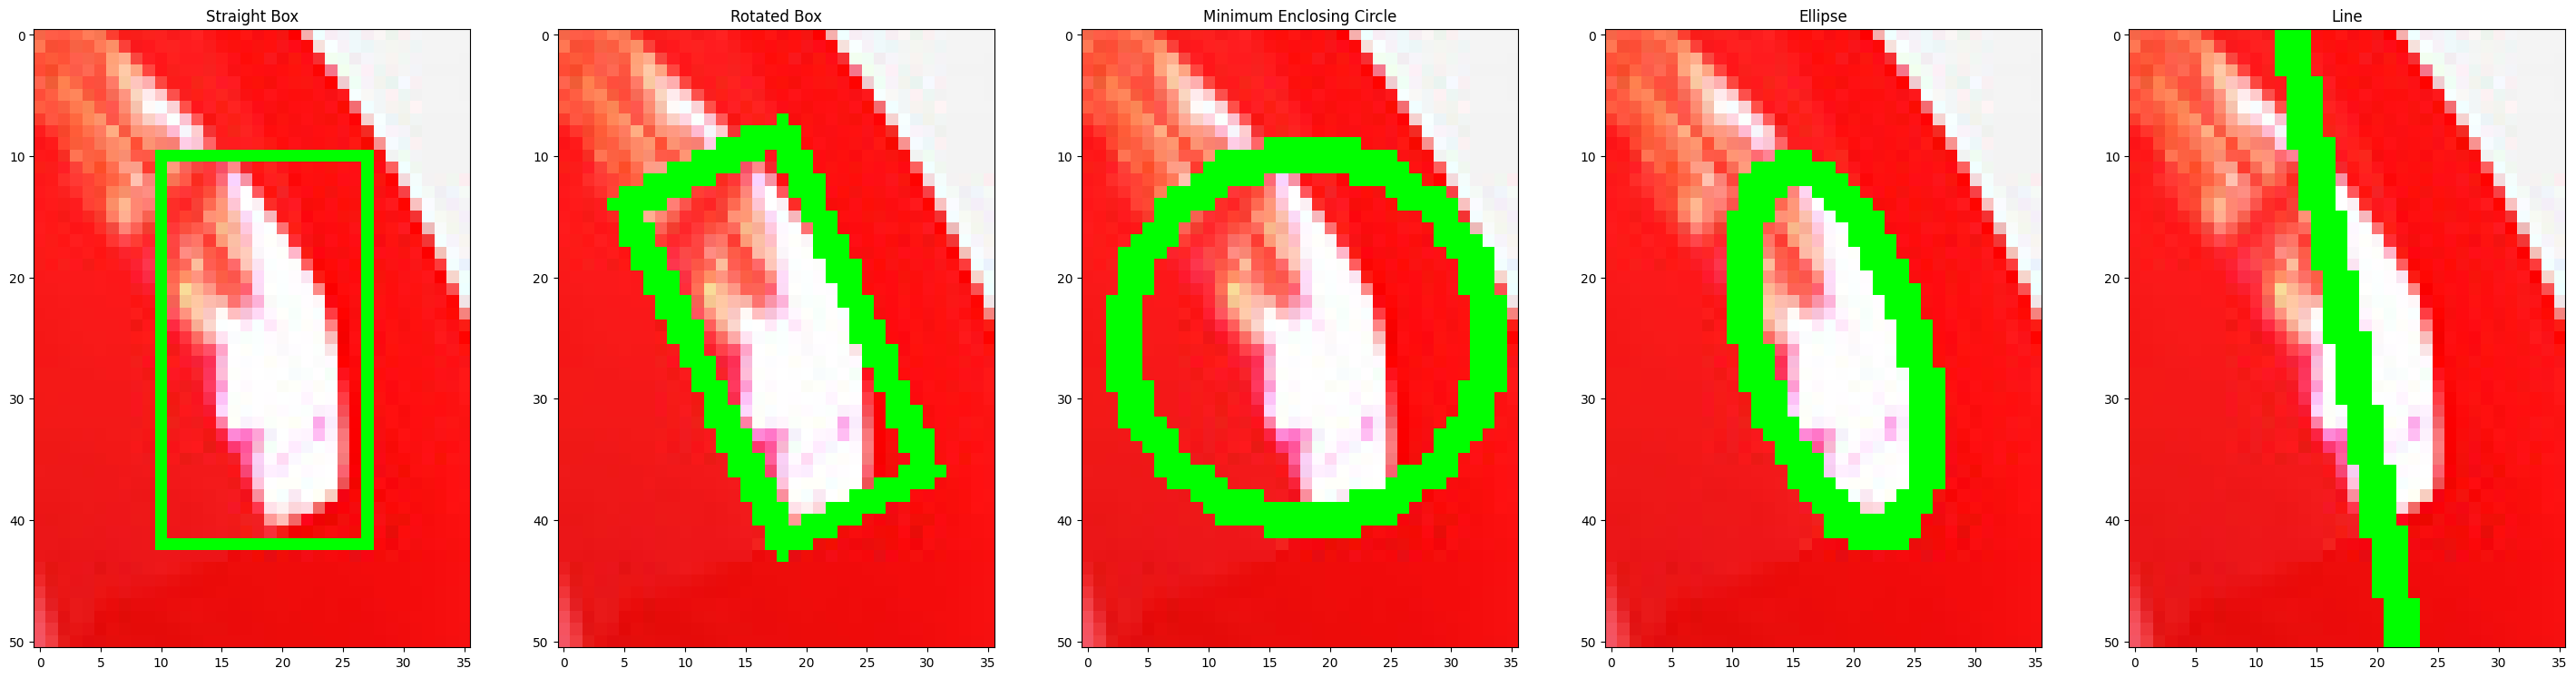

In [12]:

# straight bounding rectangle
x, y, w, h = cv.boundingRect(cnt2)
img_straight = cv.rectangle(img_.copy(), (x, y), (x+w, y+h), (0, 255, 0), 0)

# rotated bounding rectangle
rect = cv.minAreaRect(cnt2)
box = cv.boxPoints(rect)
box = np.intp(box)
img_rotated = cv.drawContours(img_.copy(), [box], 0, (0, 255, 0), 2)

# minimum encolsing circle
(x, y), radius = cv.minEnclosingCircle(cnt2)
center = (int(x), int(y))
radius = int(radius)
img_circle = cv.circle(img_.copy(), center, radius, (0, 255, 0), 2)

# ellipse
ellipse = cv.fitEllipse(cnt2)
img_ellipse = cv.ellipse(img_.copy(), ellipse, (0, 255, 0), 2)

# line
rows,cols = img_.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt2, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img_line = cv.line(img_.copy(),(cols-1,righty),(0,lefty),(0,255,0),2)

titles = [
    'Straight Box',
    'Rotated Box',
    'Minimum Enclosing Circle',
    'Ellipse',
    'Line'
]
_, ax = plt.subplots(1, len(titles), figsize=(img_.shape[1], img_.shape[0]))
for i, im in enumerate(
    [img_straight, img_rotated, img_circle, img_ellipse, img_line]
    ):
    show_image(im, ax=ax[i], show_ticks=True, title=titles[i])
plt.show()


## Countour Features

[16:34:35] INFO - Showing image ... (3.6 x 5.1)
[16:34:35] WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Aspect ratio: 0.53125
Extent: 0.5542279411764706
Solidity: 0.9248466257668712
Equivalent diameter: 19.5928998042059
Orientation: 163.92225646972656


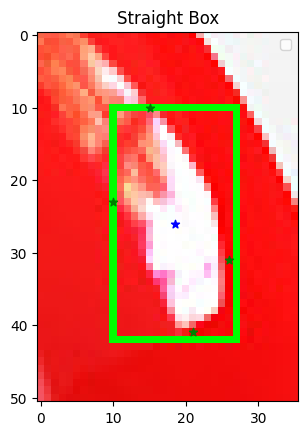

(18.441436767578125,
 26.017976760864258,
 13.143973350524902,
 30.762371063232422)

In [50]:
x, y, w, h = cv.boundingRect(cnt2)
img_straight = cv.rectangle(img_.copy(), (x, y), (x+w, y+h), (0, 255, 0), 0)

_, ax = plt.subplots(1, 1)
show_image(img_straight, show_ticks=True, title='Straight Box', scale=10, ax = ax)


print('Aspect ratio:', w/h)
# how much of box is covered by contour
print('Extent:', cv.contourArea(cnt2)/(w*h))
# how much of hull is covered by contour
print('Solidity:', cv.contourArea(cnt2)/cv.contourArea(hull))
# diameter of the circle that has the same area as the contour
print('Equivalent diameter:', np.sqrt(4*cv.contourArea(cnt2)/np.pi))
# Orientation - angle at which object is directed
(x, y), (MA, ma), angle = cv.fitEllipse(cnt2)
print('Orientation:', angle)

# min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img_)

leftmost = tuple(cnt2[cnt2[:,:,0].argmin()][0])
rightmost = tuple(cnt2[cnt2[:,:,0].argmax()][0])
topmost = tuple(cnt2[cnt2[:,:,1].argmin()][0])
bottommost = tuple(cnt2[cnt2[:,:,1].argmax()][0])

ax.scatter(x, y, marker='*', color='blue')
for p in [
    leftmost, rightmost, topmost, bottommost
]:
    ax.scatter(p[0], p[1], marker='*', color='green')

# ax.scatter(min_loc[0], min_loc[1], marker='*', color='green', label='min_val')
plt.legend()
plt.show()

x, y, MA, ma

[16:31:23] INFO - Showing image ... (3.6 x 5.1)


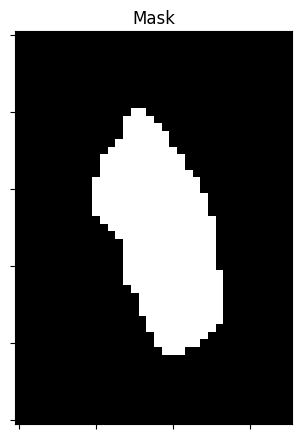

Mean val: (252.34821428571428, 170.55654761904762, 173.6547619047619, 0.0)


In [49]:
# getting the mask of cnt2
# looks like turd
mask = np.zeros(img_.shape[:2], np.uint8)
outline = cv.drawContours(mask, [cnt2], 0, 255, -1)
show_image(outline, title='Mask', scale=10, imshow_args={'cmap': 'gray'})



print('Mean val:', cv.mean(img_, mask=mask))